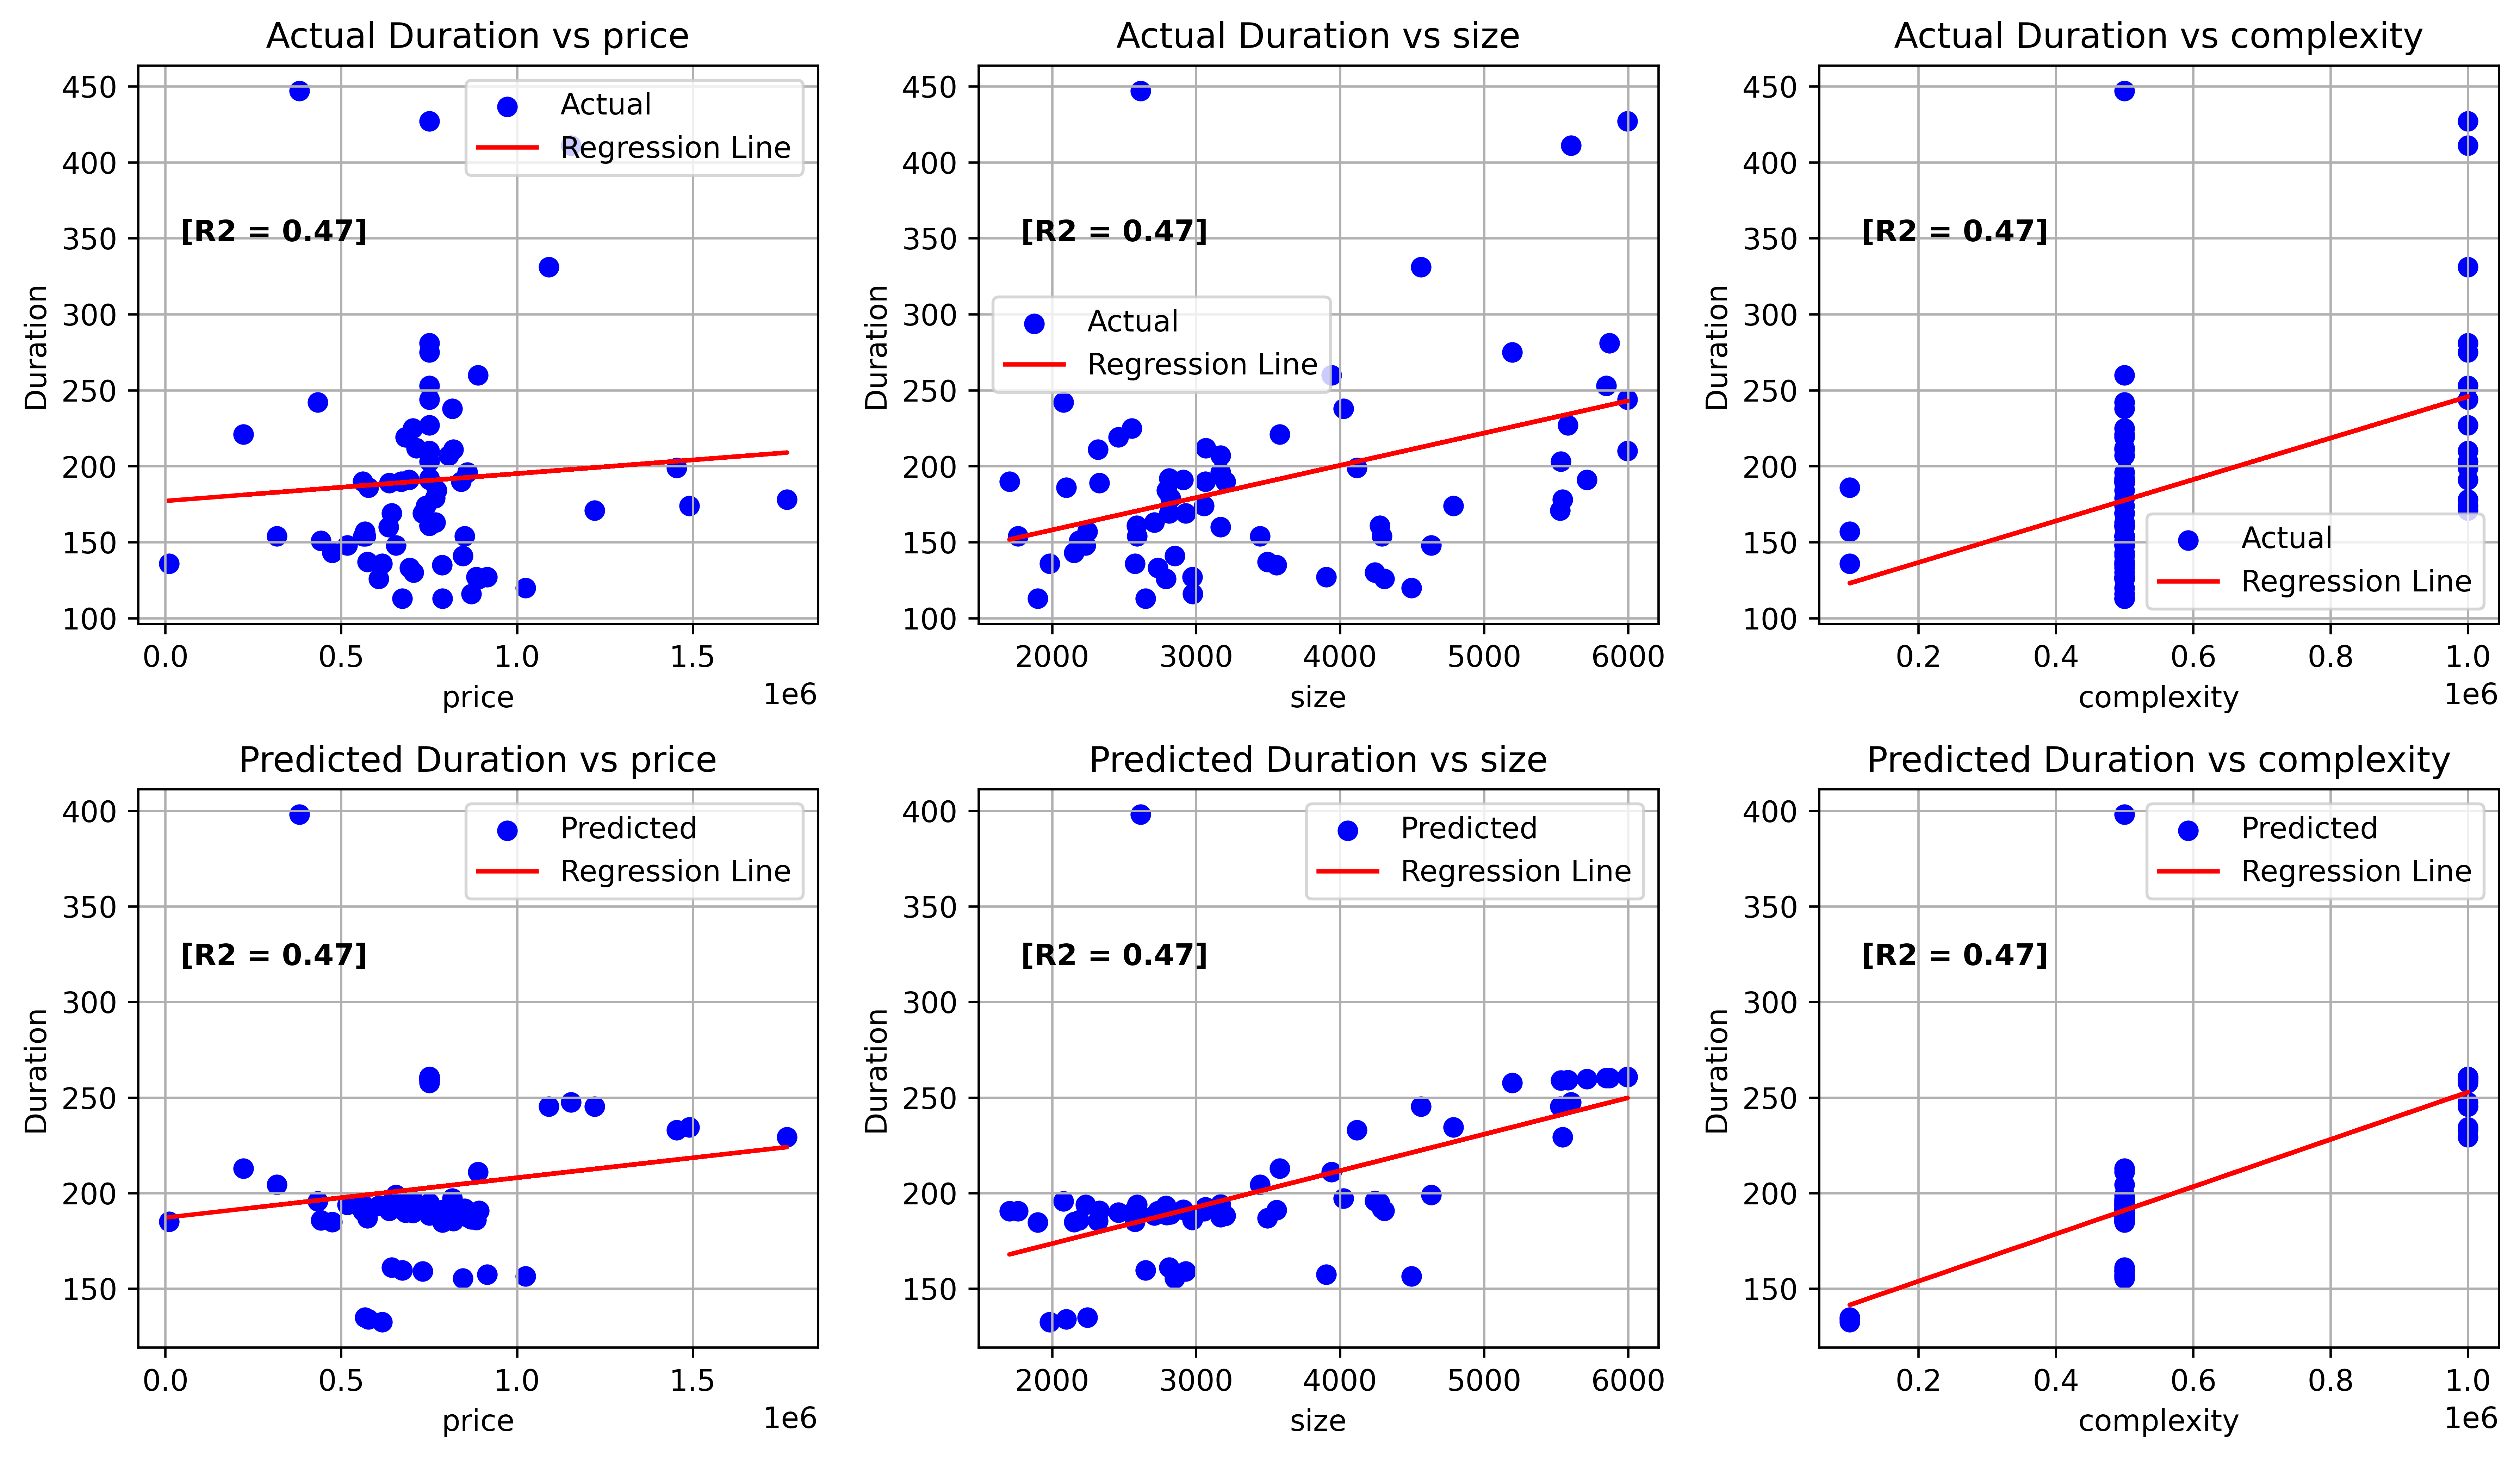

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
import os, joblib
from sklearn.metrics import r2_score
from matplotlib import rcParams

# Set Plots Output Quality to 600 DPI
rcParams['figure.dpi'] = 600

# Read the data (Place the data file next to the notebook)
data = pd.read_csv( "dataset.csv")

# Select features as input and duration as the model output
X = data[['size', 'complexity', 'price', 'location']]
y = data['duration']


# Convert categorical variables to binary variables
X = pd.get_dummies(X)

# Split the data into training (50 records) and testing (16 records) sets
X_train, X_test, y_train, y_test = X[:49], X[49:], y[:49], y[49:]

# Ensure all features are present in both datasets
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Create a linear regression model
model = Lasso()

# Train the model
model.fit(X_train, y_train)

# Predict durations for the test data
y_pred = model.predict(X_test)

# Predict durations for the all data
y_all_pred = model.predict(X)

# Convert binary variables to categorical variables(origin)
X = data[['size', 'complexity', 'price', 'location']]

# Plot actual durations with each feature
plt.figure(figsize=(16, 10))
features = ['price', 'size', 'complexity']

for i, feature in enumerate(features):
    plt.subplot(3, 4, i+1)
    plt.scatter(X[feature], y, color='blue', label='Actual')
    plt.title('Actual Duration vs {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Duration')
    plt.grid(True)

    # Calculate and plot regression line
    m, b = np.polyfit(X[feature], y, 1)
    plt.plot(X[feature], m*X[feature] + b, color='red', label='Regression Line')
    plt.legend()

    # Calculate R2
    r2 = r2_score(y, y_all_pred)
    plt.text(0.2, 0.7, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')

# Plot predicted durations with each feature
for i, feature in enumerate(features):
    plt.subplot(3, 4, i+5)
    plt.scatter(X[feature], y_all_pred, color='blue', label='Predicted')
    plt.title('Predicted Duration vs {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Duration')
    plt.grid(True)

    # Calculate and plot regression line
    m, b = np.polyfit(X[feature], y_all_pred, 1)
    plt.plot(X[feature], m*X[feature] + b, color='red', label='Regression Line')
    plt.legend()

    # Calculate R2
    r2 = r2_score(y, y_all_pred)
    plt.text(0.2, 0.7, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')
    
plt.tight_layout()
plt.show()

# Copy X(origin data) to X2
X2 = X.copy()

# Assuming 'location' is a categorical variable in X
# Convert categorical variables to numerical
pd.options.mode.copy_on_write = True
X['location'], _ = pd.factorize(X['location'])

# Plot actual durations with location feature
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.scatter(X2['location'], y, color='blue', label='Actual')
plt.xticks(rotation='vertical')
plt.title('Actual Duration vs Location')
plt.xlabel('Location')
plt.ylabel('Duration')
plt.grid(True)

# Calculate and plot regression line
m, b = np.polyfit(X['location'], y, 1)
plt.plot(X['location'], m*X['location'] + b, color='red', label='Regression Line')
plt.legend()
# Calculate R2
r2 = r2_score(X['location'], y)
plt.text(0.2, 0.9, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')


plt.subplot(2, 1, 2)
plt.scatter(X2['location'], y_all_pred, color='blue', label='Predicted')
plt.xticks(rotation='vertical')
plt.title('Predicted Duration vs {}'.format('location'))
plt.xlabel('Location')
plt.ylabel('Duration')
plt.grid(True)
# Calculate and plot regression line
m, b = np.polyfit(X['location'], y_all_pred, 1)
plt.plot(X['location'], m*X['location'] + b, color='red', label='Regression Line')
plt.legend()
# Calculate R2
r2 = r2_score(X['location'], y_all_pred)
plt.text(0.2, 0.9, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')



plt.tight_layout()
plt.show()

# Define the path to save the model
model_path = "GantAI_Model_V3.pkl"

# Save the model to disk
joblib.dump(model, model_path)

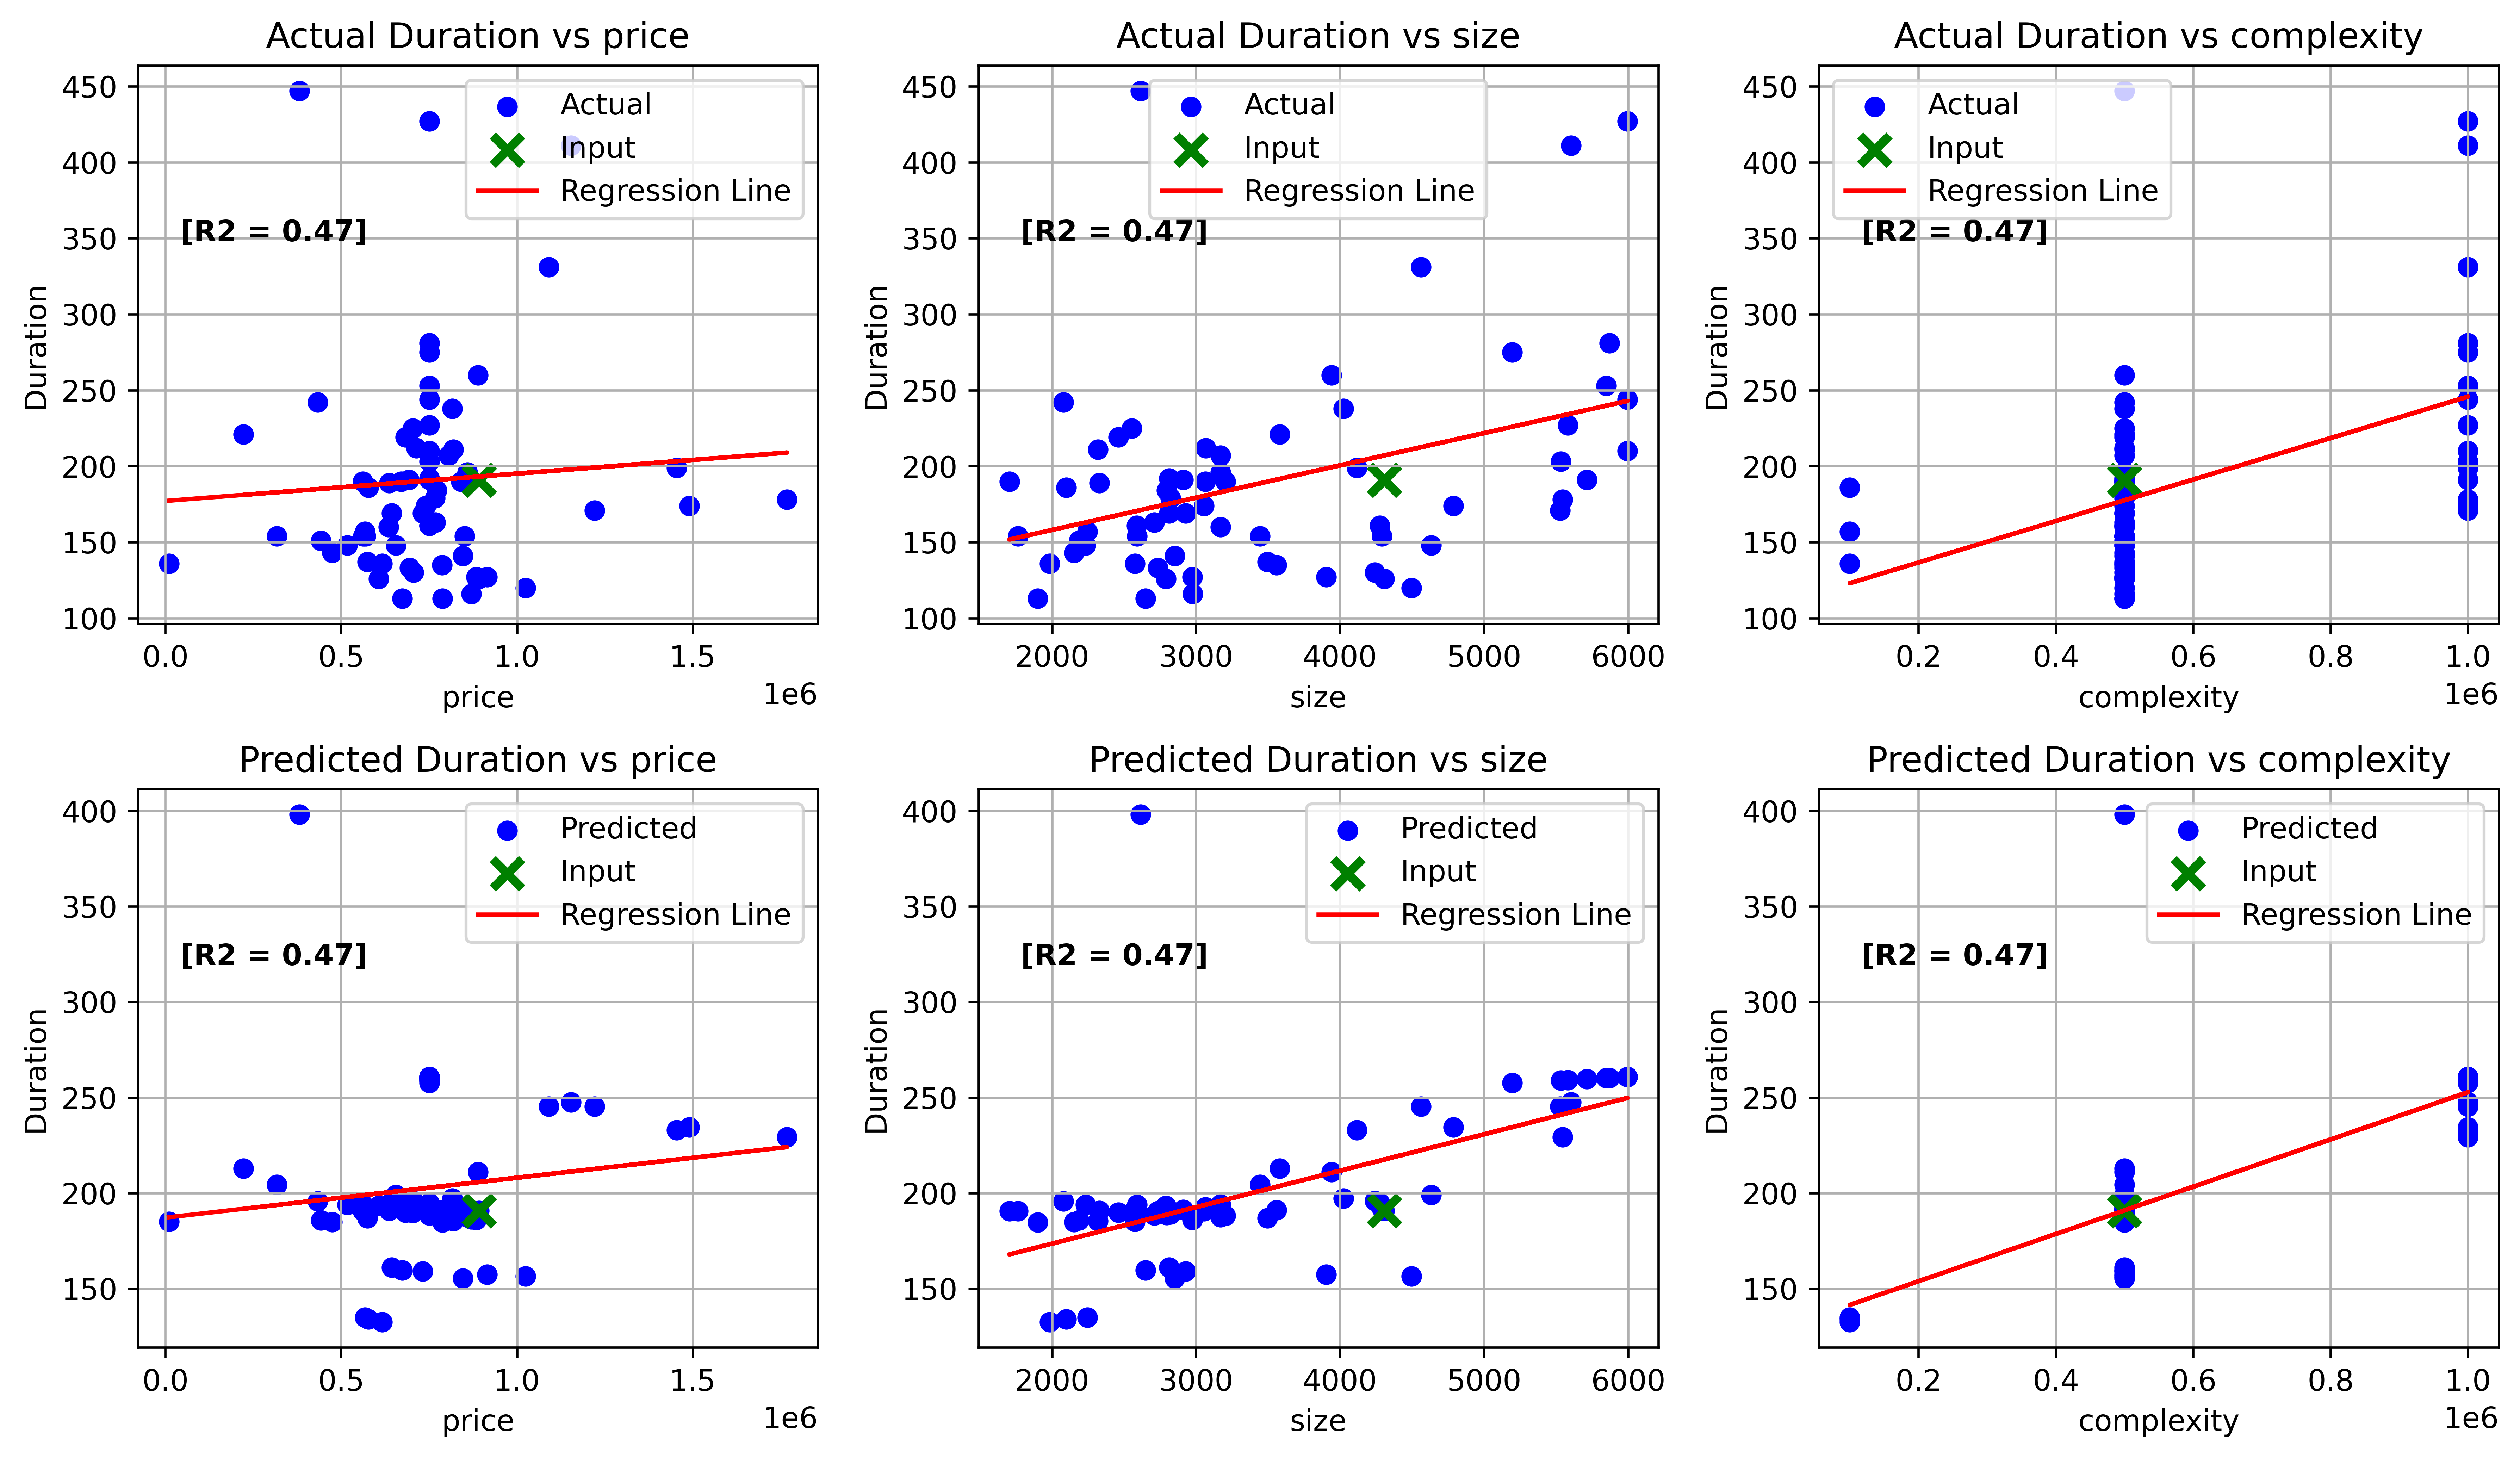

In [2]:
# size = 4307
# complexity = 500000
# price = 892519.0
# location = 'Marsh Island'

ordered_dict = {
    "size": [4307],
    "complexity": [500000],
    "price": [892519.0],
    "location_Arbor-Lyn": [0],  # Set default value to 0 for location features
    "location_Cardinal Grove": [0],
    "location_Durham Farms": [0],
    "location_Forest Hills": [0],
    "location_Governors": [0],
    "location_Hailey's Glen": [0],
    "location_Marlin Chase": [0],
    "location_Marsh Island": [1], # set to 1 for location selected
    "location_Mosaic": [0],
    "location_NewMarket": [0],
    "location_Outer Banks": [0],
    "location_Peninsula": [0],
    "location_Peninsula Lakes": [0],
    "location_River Mill": [0],
    "location_Walden": [0],
    "location_Welches Pond": [0]
}
input_data = pd.DataFrame(ordered_dict)

# Predict duration for the input data
y_input_pred = model.predict(input_data)

# Plot actual durations with each feature
plt.figure(figsize=(16, 10))
features = ['price', 'size', 'complexity']

for i, feature in enumerate(features):
    plt.subplot(3, 4, i+1)
    plt.scatter(X[feature], y, color='blue', label='Actual')
    plt.scatter(input_data[feature], y_input_pred, color='green', label='Input', marker='x', s=100, linewidths=3)  # Plot input data in green
    plt.title('Actual Duration vs {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Duration')
    plt.grid(True)

    # Calculate and plot regression line
    m, b = np.polyfit(X[feature], y, 1)
    plt.plot(X[feature], m*X[feature] + b, color='red', label='Regression Line')
    plt.legend()

    # Calculate R2
    r2 = r2_score(y, y_all_pred)
    plt.text(0.2, 0.7, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')

# Plot predicted durations with each feature
for i, feature in enumerate(features):
    plt.subplot(3, 4, i+5)
    plt.scatter(X[feature], y_all_pred, color='blue', label='Predicted')
    plt.scatter(input_data[feature], y_input_pred, color='green', label='Input', marker='x', s=100, linewidths=3)  # Plot input data in green
    plt.title('Predicted Duration vs {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Duration')
    plt.grid(True)

    # Calculate and plot regression line
    m, b = np.polyfit(X[feature], y_all_pred, 1)
    plt.plot(X[feature], m*X[feature] + b, color='red', label='Regression Line')
    plt.legend()

    # Calculate R2
    r2 = r2_score(y, y_all_pred)
    plt.text(0.2, 0.7, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')
    
plt.tight_layout()
plt.show()
